# DBSCAN. Практическая работа

## Цель практической работы

Научиться строить модели кластеризации с помощью метода DBSCAN.

## Что входит в работу


- Загрузите данные и проведите разведочный анализ.
- Предположите оптимальное количество кластеров.
- Постройте модель кластеризации DBSCAN.
- Определите оптимальное количество и структуру кластеров.
- Интерпретируйте полученные результаты.

## Что оценивается

1. Выполнены все задания.
2. Сделаны выводы по результатам разведочного анализа данных.
3. Объяснены выбранные гиперпараметры модели кластеризации.
4. Сделаны выводы о количестве и структуре кластеров.
5. Сделаны выводы по результатам кластеризации.

# Задача

Имеется некоторый набор данных `gt_2015.csv` о производительности и других параметрах ветряных электростанций:
* AT — температура окружающей среды.
* PT — давление окружающей среды.
* AH — влажность окружающей среды.
* AFDP — перепад давления на воздушном фильтре.
* GTEP — давление на выходе из газовой турбины.
* TIT — температура на входе в турбину.
* TAT — температура на выходе из турбины.
* TEY — энергоотдача турбины.
* CDP — давление нагнетания компрессора.
* CO — выбросы угарного газа.
* NOX — выбросы оксидов азота.

Решите задачу кластеризации электростанций для дальнейшего совместного управления схожими электростанциями.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('gt_2015.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515
...,...,...,...,...,...,...,...,...,...,...,...
7379,3.62680,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
7380,4.16740,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
7381,5.48200,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
7382,5.88370,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738


Моя профессия (на сегоднешний день)  электро и теплоэнергетика. Я рада, что появилось задание очень близкое моему образованию и сфере деятельности. Это данные мониторинга работу газовых турбин в части выбросов в атмосферу загрязняющих веществ CO (оксида углерода) и NOx(оксидов азота).

Газовые турбины играют решающую роль в решении проблемы изменения климата и достижении энергетической устойчивости. Поскольку страны стремятся стать экономиками с низким потреблением энергии, они все больше внимания уделяют чистым, локально производимым, устойчивым и безопасным источникам энергии.

Тепловые электрические станции (ТЭС и ТЭЦ) вносят значительный вклад в выбросы парниковых газов (ПГ), загрязнителей воздуха, таких как оксиды азота (NOx ).

Эффективные и инновационные технологии, внедренные на теплоэлектростанциях, могут помочь снизить загрязнение воздуха и затраты, тем самым улучшая воздействие на окружающую среду и конкурентоспособность отрасли.

Одним из основных источников вредных выбросов, включая NOx , оксиды углерода (CO) и диоксид углерода (CO2), является сжигание ископаемого топлива для производства тепла и электроэнергии. Электростанции особенно нацелены на сокращение выбросов посредством строгих экологических норм, применяемых в разных странах.

Выбросы CO2 вызывают особую озабоченность, поскольку они составляют значительную часть выбросов парниковых газов и способствуют глобальному потеплению и нестабильности климата. По данным Международного энергетического агентства (МЭА), глобальные выбросы CO 2 выросли на −5,1% в 2019–2020 годах из-за снижения спроса на энергию, а затем на 6% в 2020–2021 годах из-за увеличения спроса на энергию.

Мониторинг выбросов и управление сложностью полученных данных являются критически важными аспектами решения экологических проблем, связанных с газовыми турбинами. Используемые методологии выбираются для обеспечения эффективного измерения, контроля и соответствия нормативным стандартам.






# Задание 2

Предположите по результатам разведочного анализа данных, какие группы электростанций существуют, чем они отличаются, каково их количество.

In [3]:
print(df.describe())
print(df.info())

                AT          AP           AH         AFDP         GTEP  \
count  7384.000000  7384.00000  7384.000000  7384.000000  7384.000000   
mean     17.225259  1014.50911    68.647464     3.598909    26.130149   
std       8.095783     6.89543    13.541116     0.610226     4.473737   
min      -6.234800   989.40000    24.085000     2.368800    17.698000   
25%      11.073250  1009.67500    59.447250     3.117300    23.147000   
50%      17.456500  1014.00000    70.952000     3.538500    25.331000   
75%      23.684750  1018.30000    79.653750     4.194825    30.018250   
max      37.103000  1036.60000    96.666000     5.239500    40.716000   

               TIT          TAT          TEY          CDP           CO  \
count  7384.000000  7384.000000  7384.000000  7384.000000  7384.000000   
mean   1078.974689   546.642484   133.993380    12.097025     3.129986   
std      19.762449     5.489066    16.179208     1.136601     2.234962   
min    1016.000000   516.040000   100.020000  

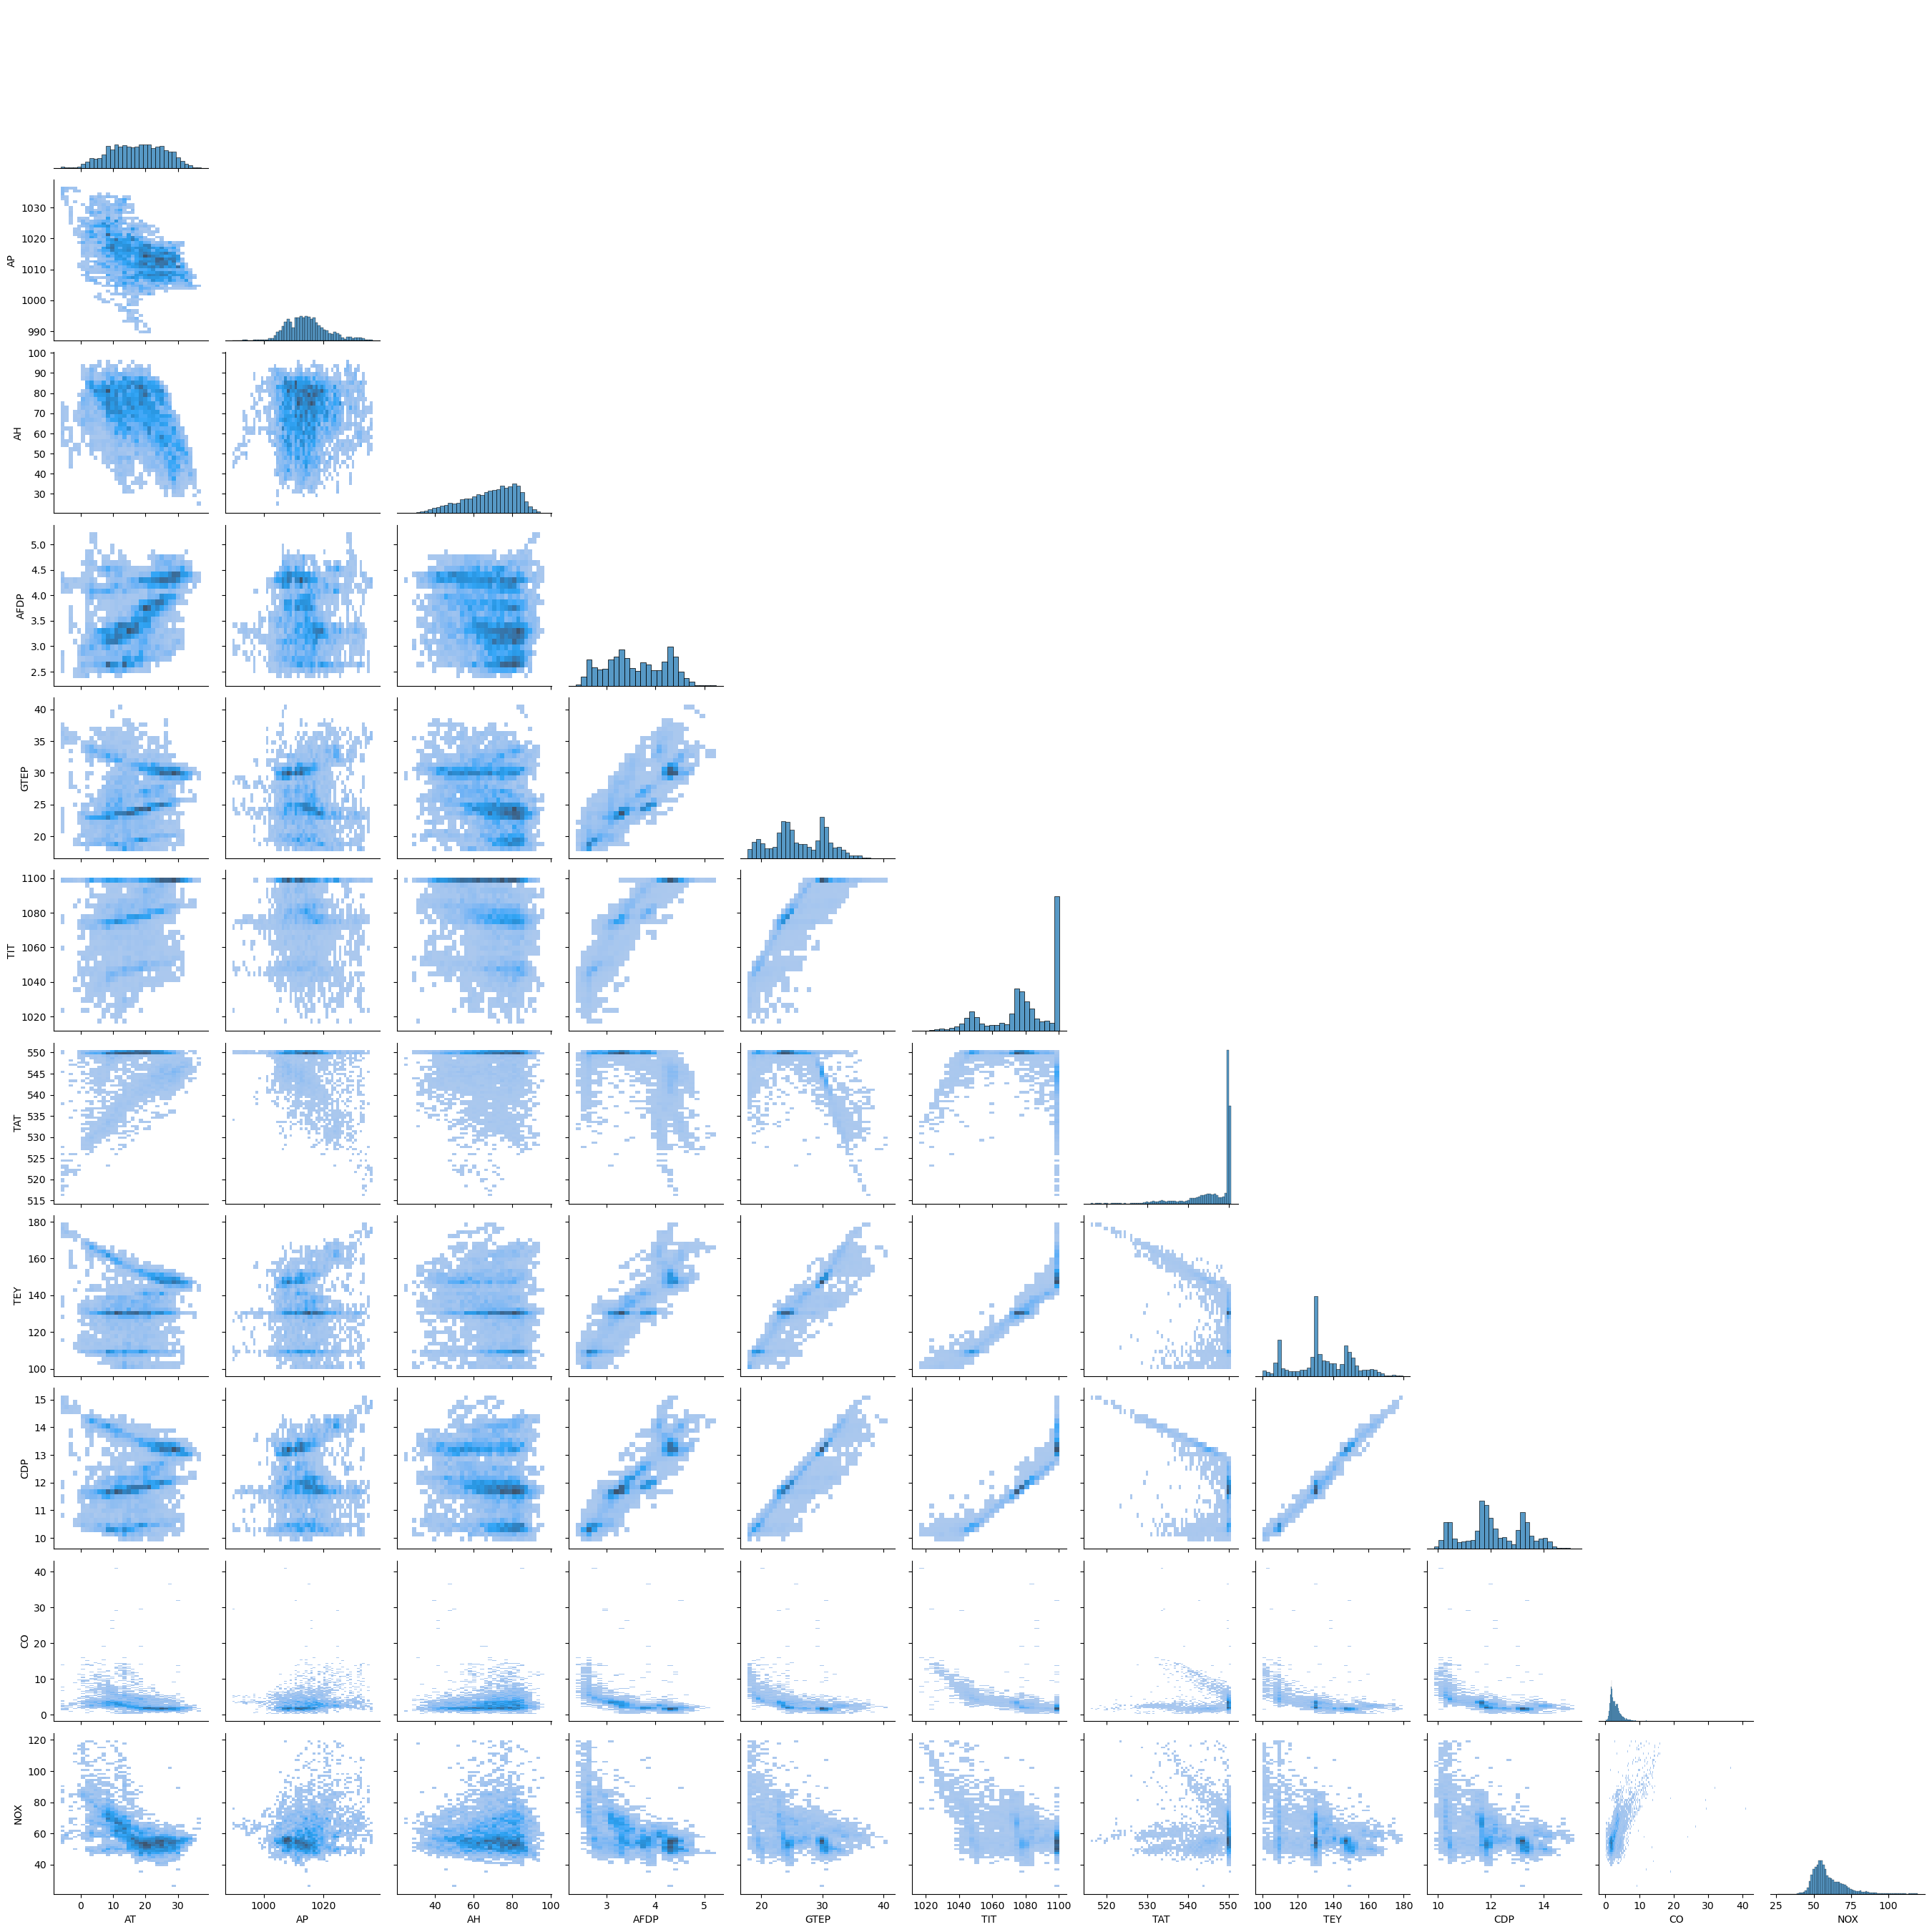

In [4]:
sns.pairplot(df, corner=True, kind="hist");

Видно, что между некоторыми параметрами наблюдается довольно сильная корреляция. А у признака **CO** явно присутствует много выбросов

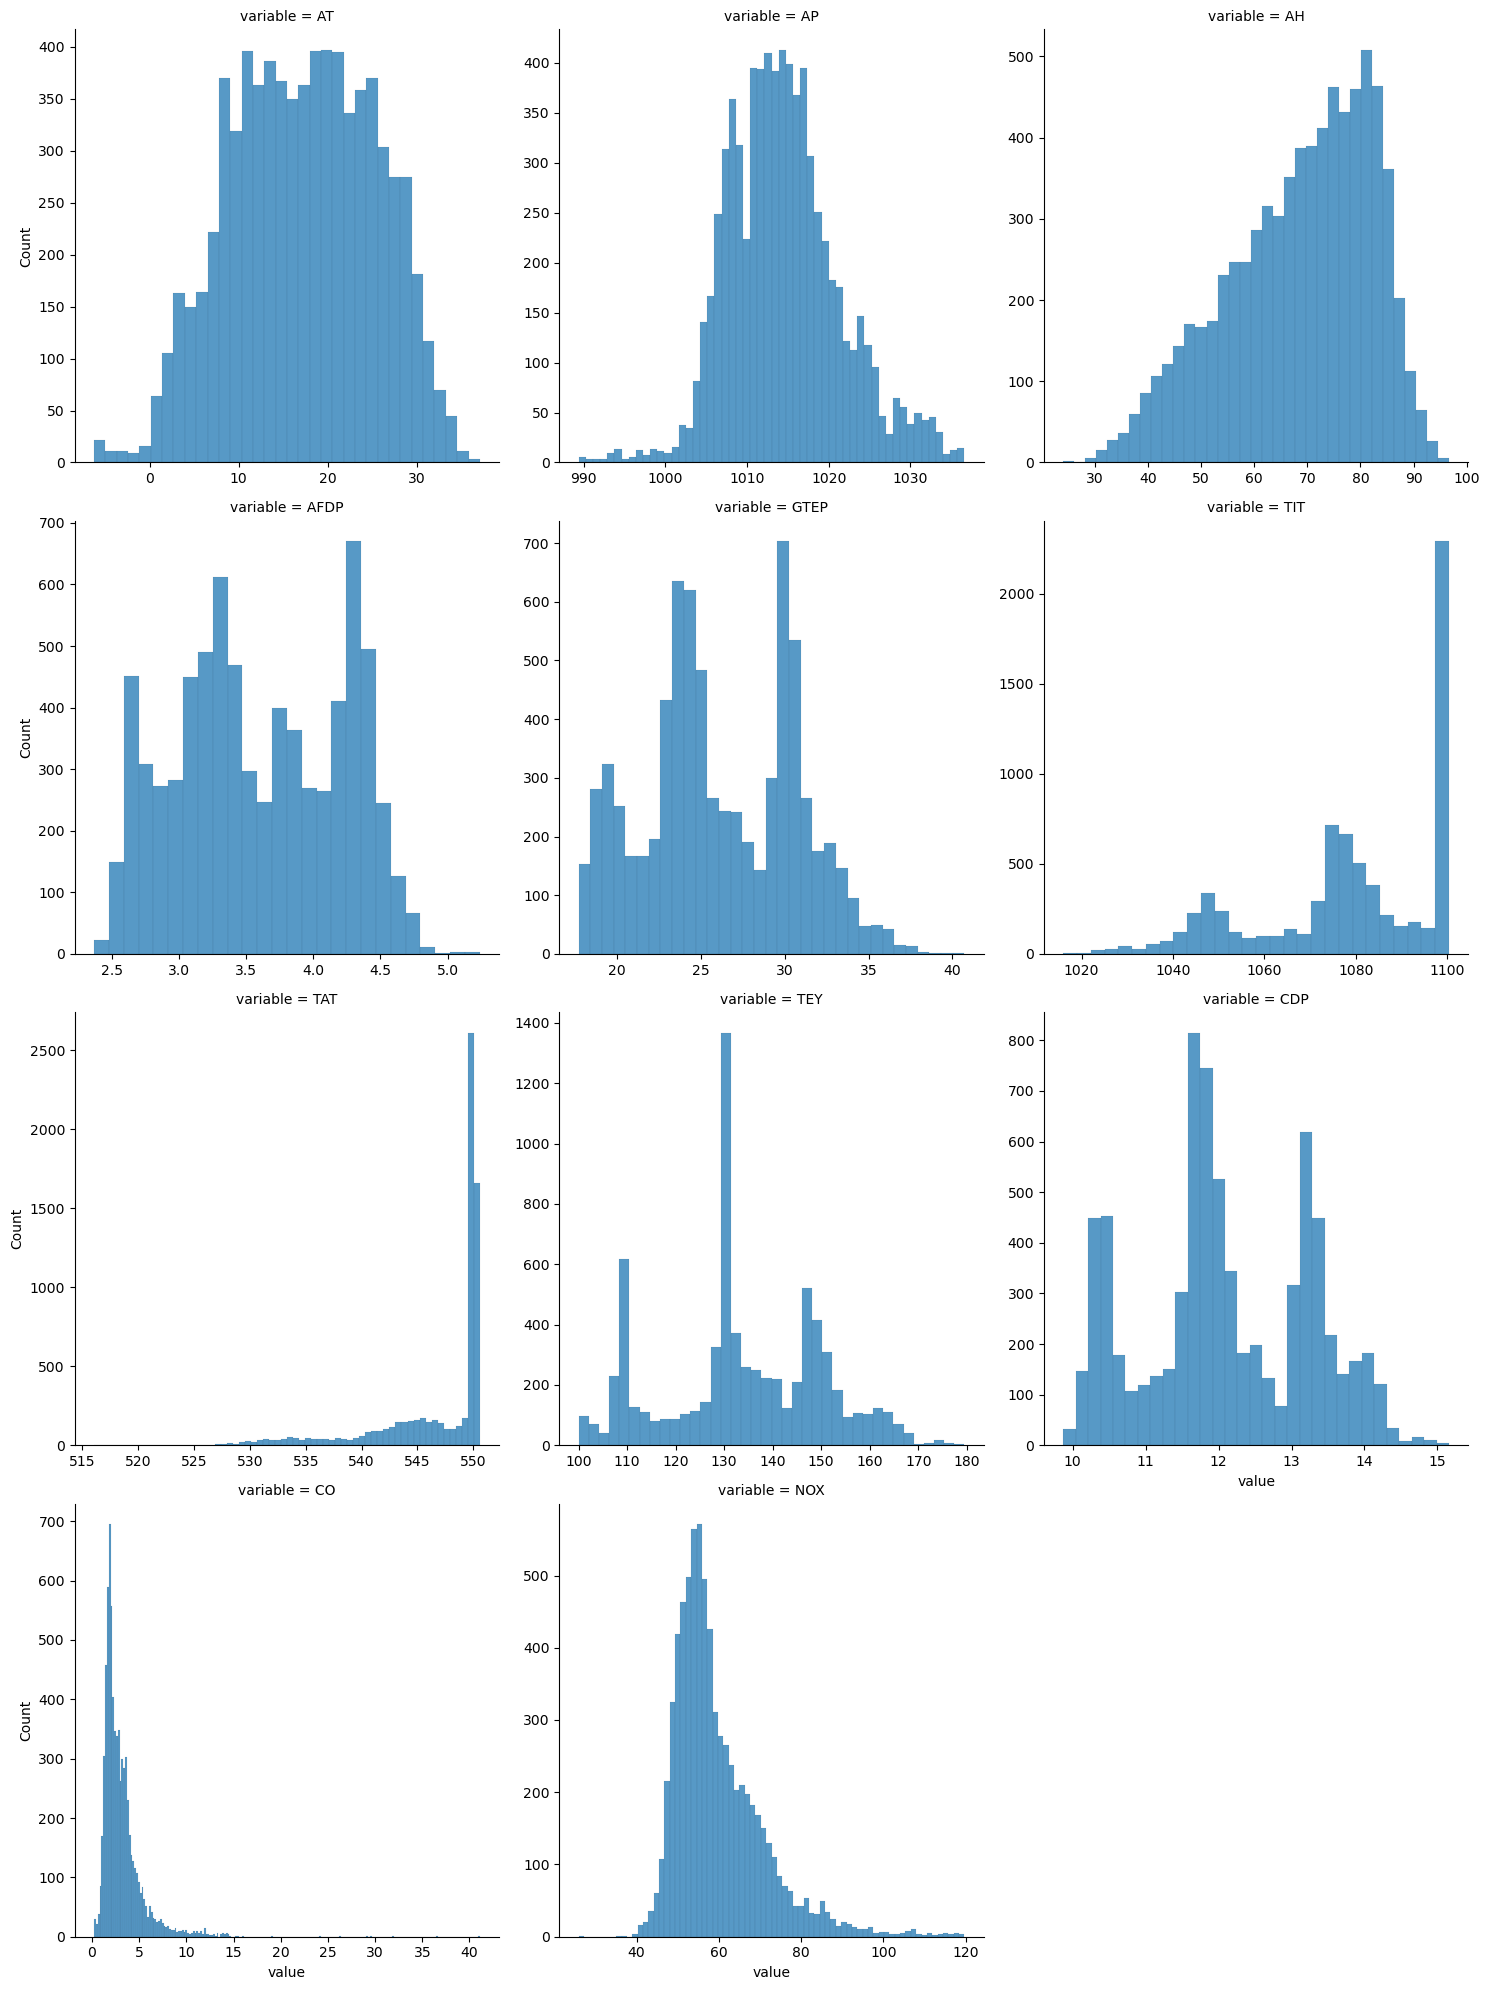

In [5]:
# Рассмотрим распределение величин

sns.displot(
    x='value',
    data=df.melt(value_vars=df),
    col='variable',
    kind='hist',
    col_wrap=3,
    facet_kws={'sharex':False, 'sharey':False},
    common_bins=False
);

Наблюдается бимодальная функция плотности вероятности для AT.

GTEP, TEY и CDP имеют схожие тримодальные формы с точки зрения плотности признаков. CO представляет собой лево-скошенную плотность, с другой стороны, TAT имеет право-скошенную плотность.

У AT(влажности) есть перекос в сторону более высоких значений, что может быть объяснено размещением большей части ГТУ в прибрежной зоне.

В значениях выбросов вредных веществ явно присутствуют аномалии.

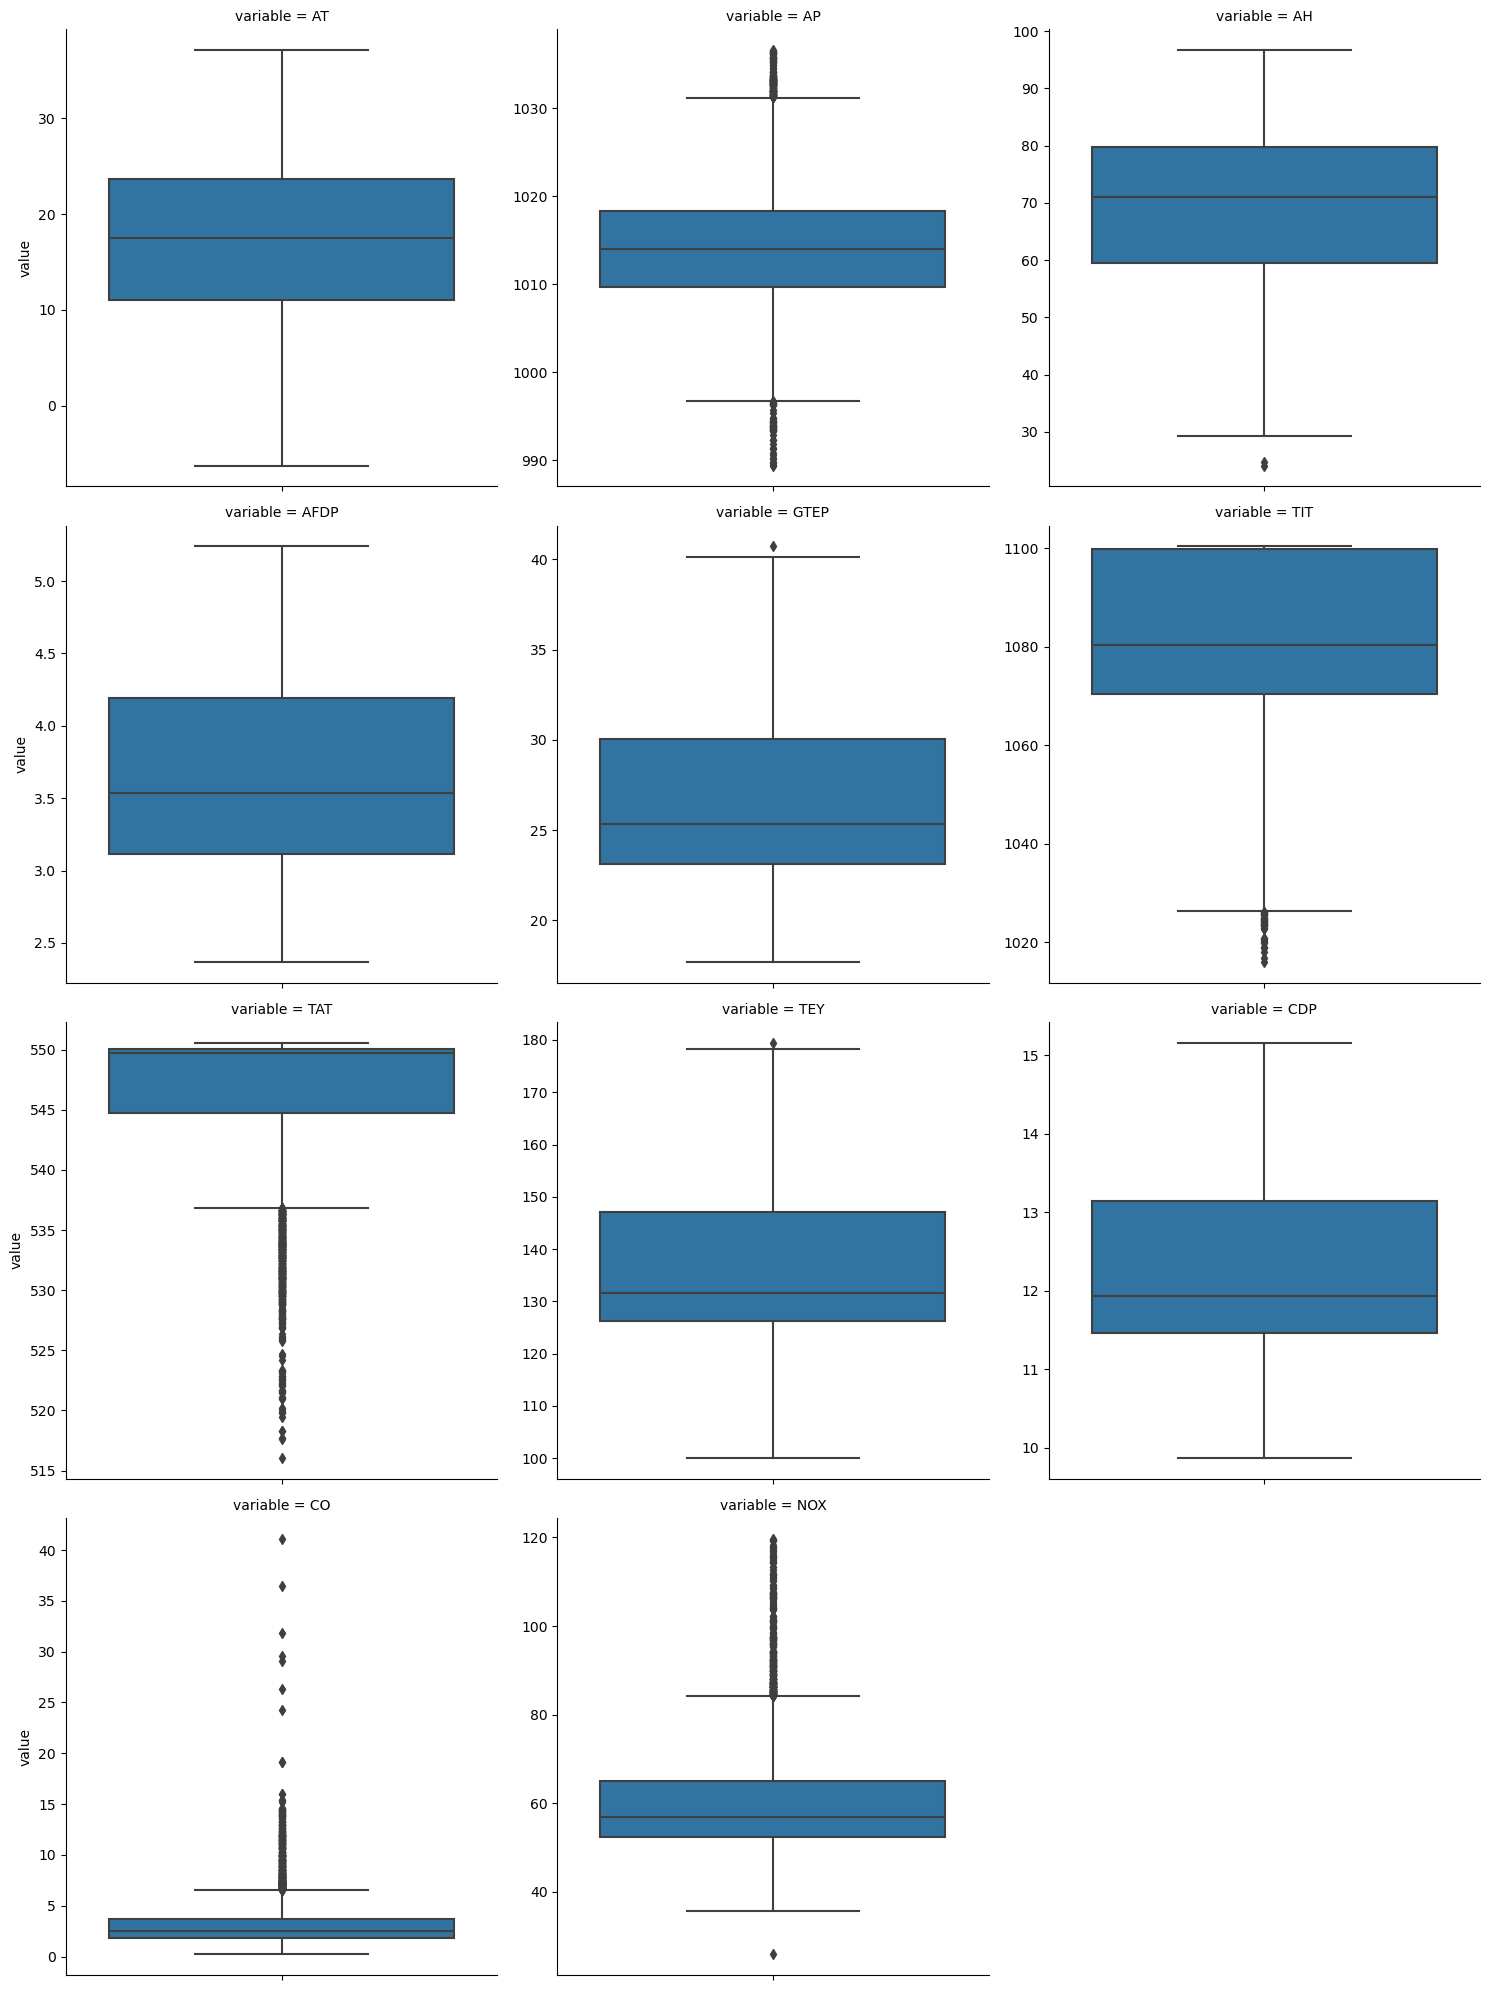

In [6]:
# Рассмотрим отдельно выбросы

sns.catplot(
    y='value',
    data=df.melt(value_vars=df.columns),
    col='variable',
    kind='box',
    col_wrap=3,
    sharex=False,
    sharey=False,
);

Да, есть много аномалий. При этом некоторые значения, которые являются аномалиями по отношению к интерквартильному размаху, по факту реальные значения. Например, если в качестве топлива применяется не природный газ, а дизельное топливо, то и температуры как перед турбиной, так и после будут ниже. Но ГТУ на жидком топливе используются гораздо реже, чем на природном газе, поэтому таких значений меньше.

Видим очень большое число выбросов среди значений по оксиду углерода (CO). Как правило, повышенные значения СО среди продуктов сгорания могут быть тоже нормой, если турбина работает в переходных режимах (запуск, прогрев), но обычно эти режимы непродолжительны. Также на количество выбросов может влиять и тип топлива, и его качество.

Количество близких по параметрам работы электростанций просчитано в задании 3 (модель кластеризации).

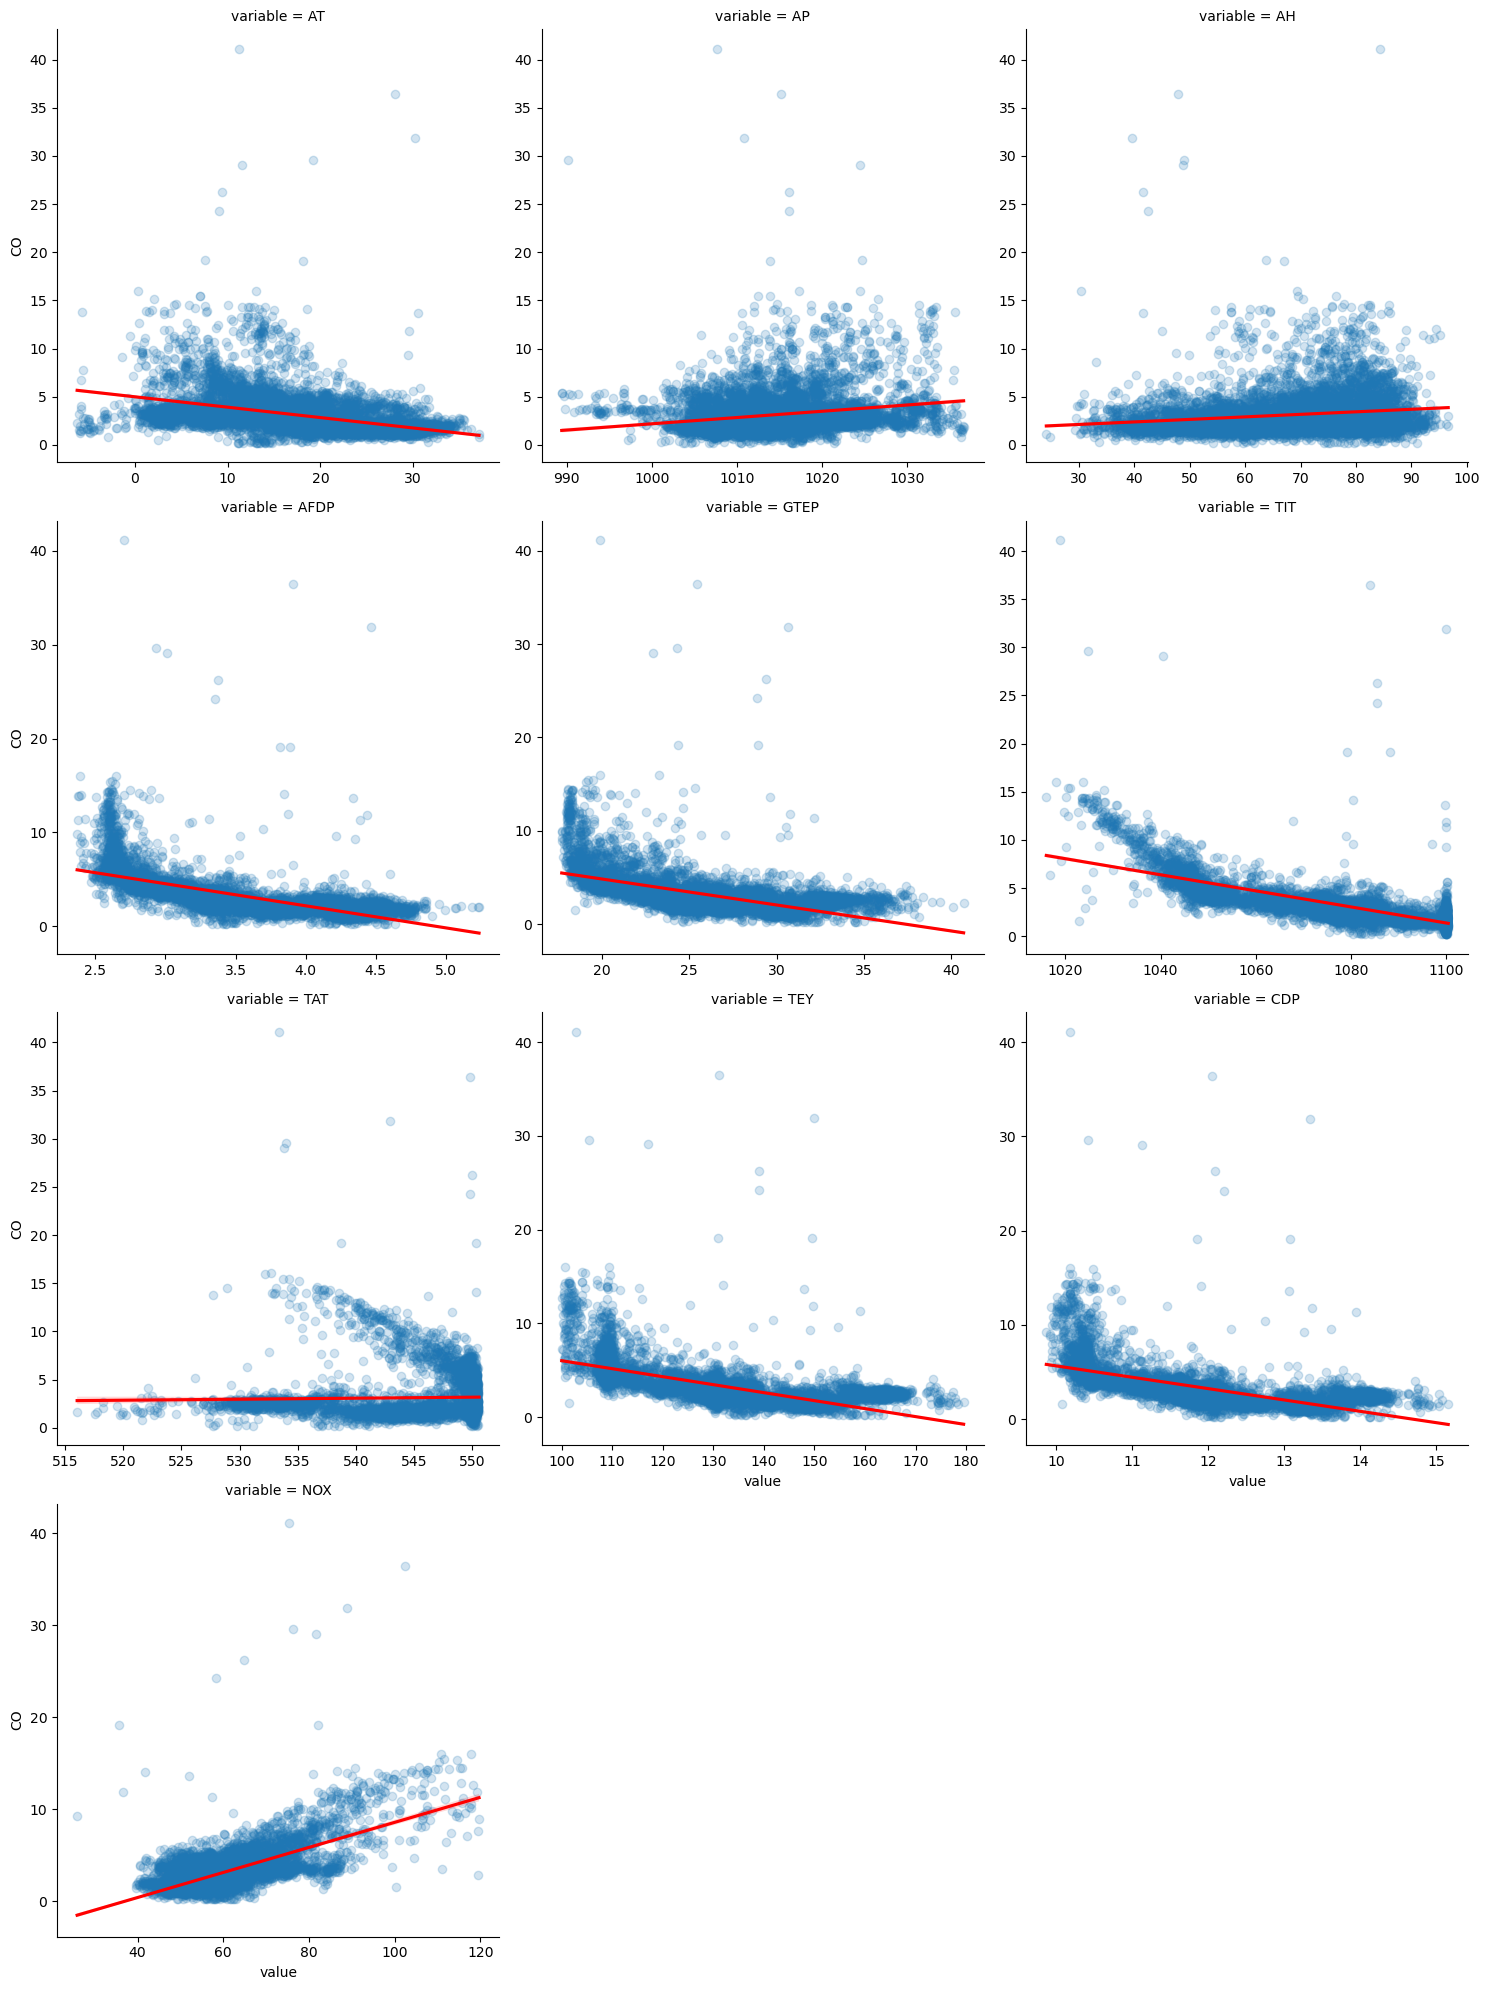

In [7]:
# Ещё раз внимательнее посмотрим на графики CO и NOX

ax = sns.lmplot(
    x='value',
    y='CO',
    data=df.melt(id_vars='CO', value_vars=df),
    col='variable',
    col_wrap=3,
    sharex=False,
    sharey=False,
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.2}
)
ax.tight_layout();

Хорошо прослеживаются зависимости, что с ростом измеренной текущей моности ГТУ **TEY**  и  **CDP**, **TIT** уменьшается количество выбросов СО.

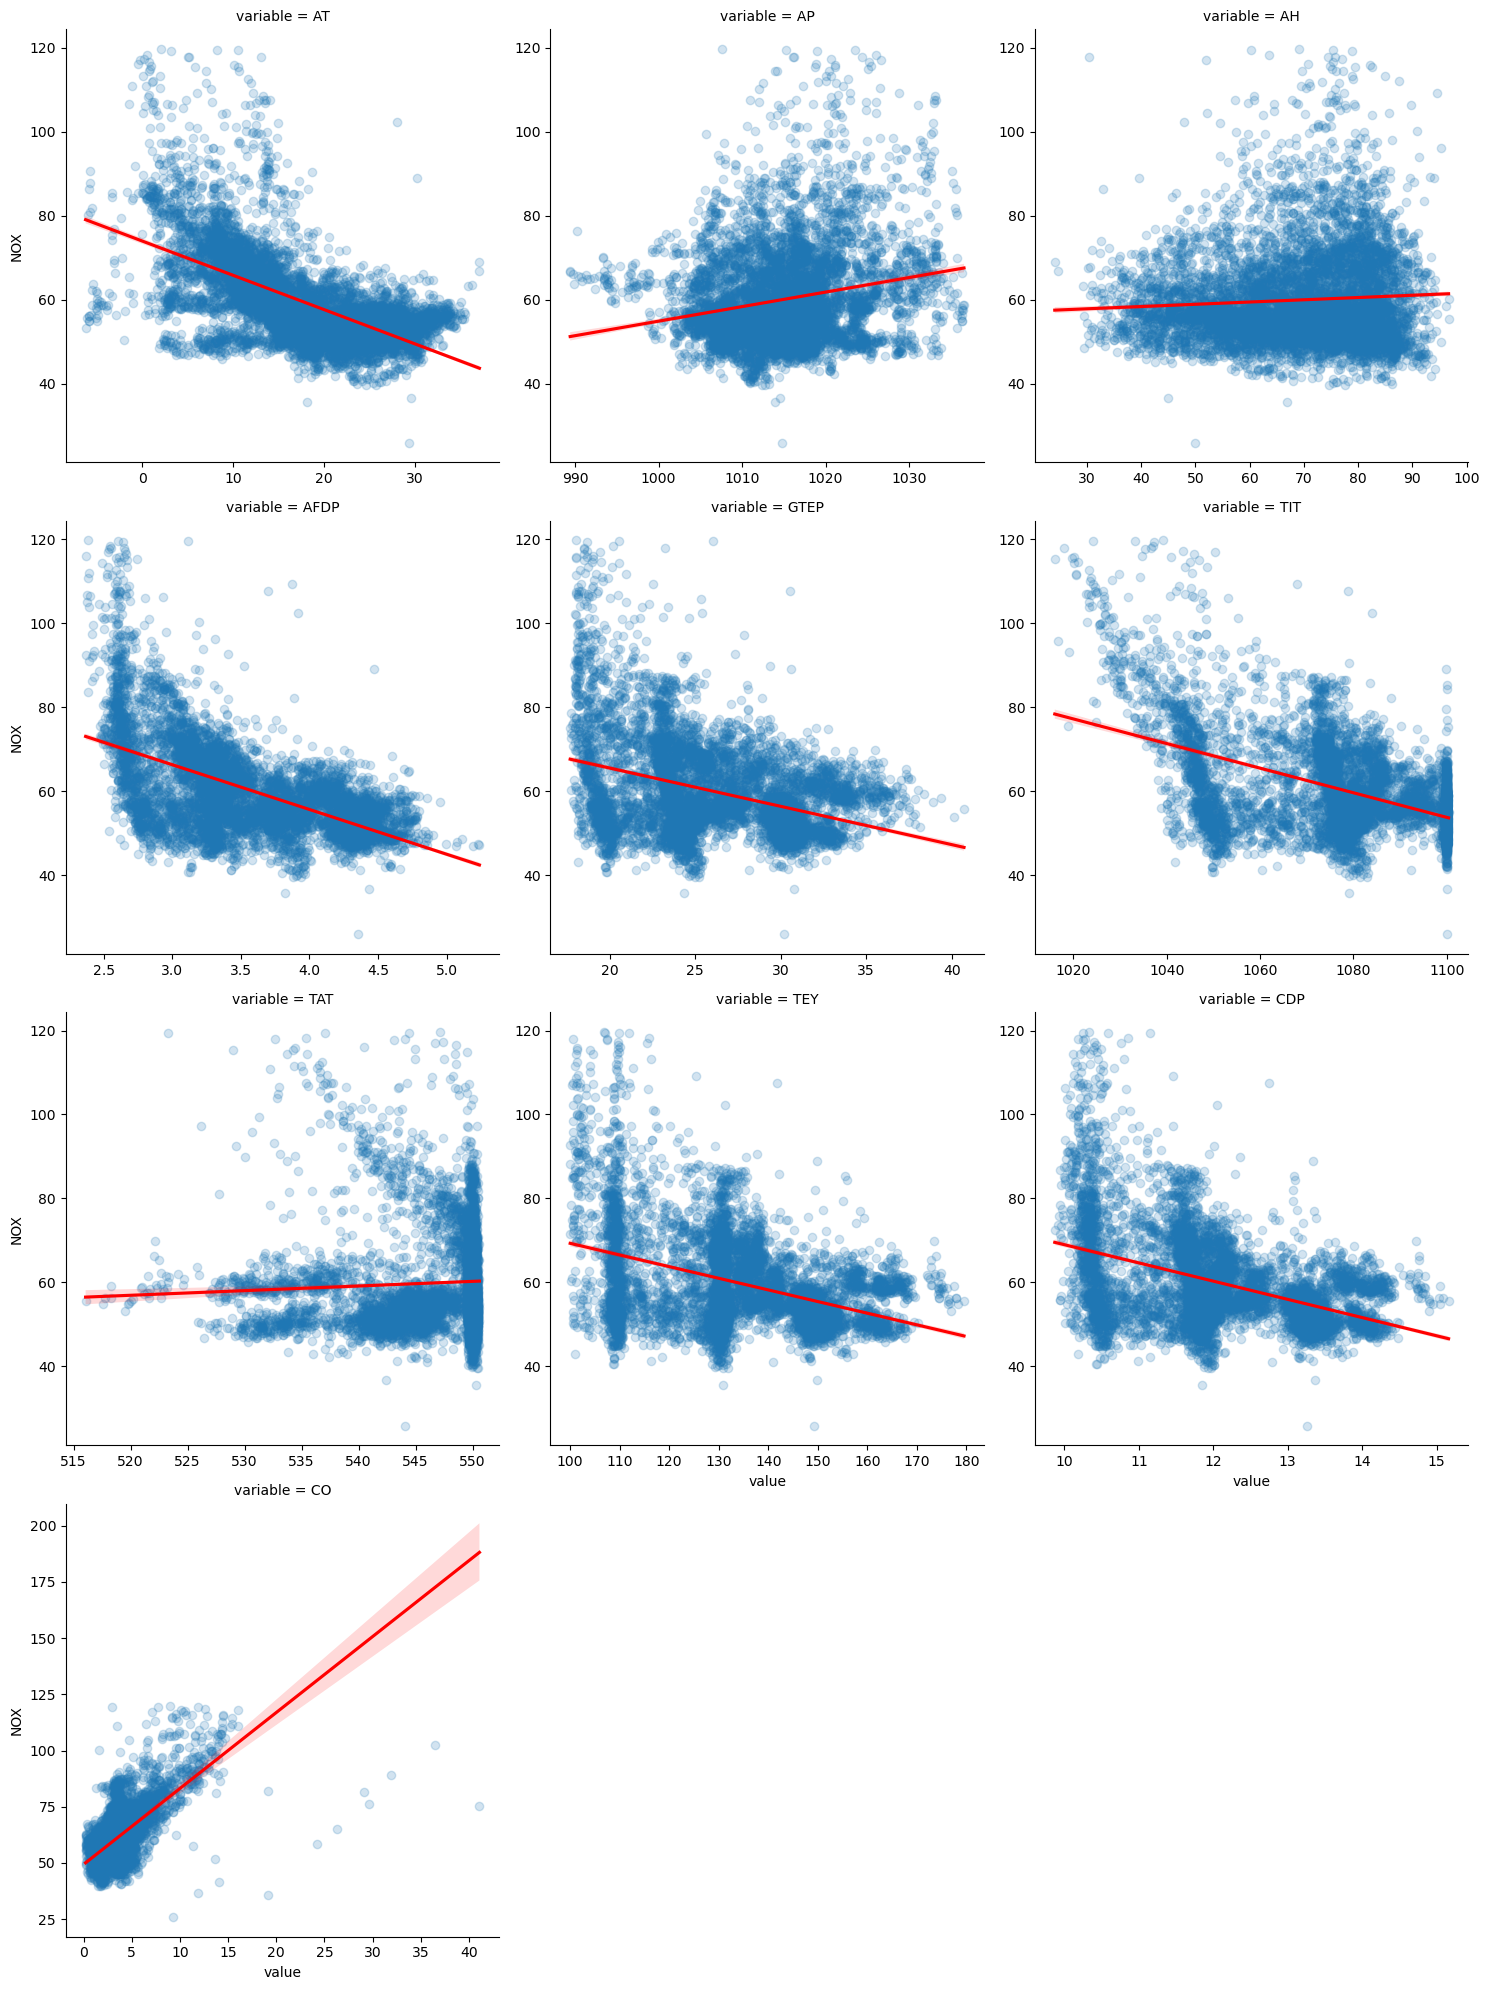

In [8]:
ax = sns.lmplot(
    x='value',
    y='NOX',
    data=df.melt(id_vars='NOX', value_vars=df),
    col='variable',
    col_wrap=3,
    sharex=False,
    sharey=False,
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.2}
)
ax.tight_layout();

Здесь зависимости не столь очевидны. Но очень хороша видна зависимость между CO и NOx.

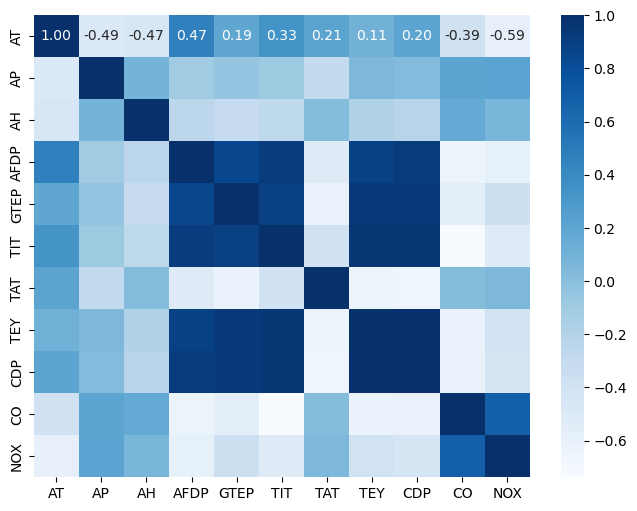

In [9]:
# Посмотрим на матрицу корреляций

plt.figure(figsize=(8,6))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='Blues',
    fmt='.2f',
);

 CO имеет наибольшую корреляцию с NOx. За ним следуют AT и AFDP. С другой стороны, TIT имеет самую значительную корреляцию с CO, за ним следуют NOx и AFDP.

Здесь параметры можно разделить на природные и технические. Природные - это, соответственно температура воздуха, влажность и давление. Технические - это рабочие характеристики газотурбинных установок. Мы видим, что у технических параметров наблюдается довольно сильная корреляция друг с другом. CO имеет наибольшую корреляцию с NOx. За ним следуют AT и AFDP. С другой стороны, TIT имеет самую значительную корреляцию с CO, за ним следуют NOx и AFDP. Технические и природные параметры коррелированы слабо.

# Задание 3

Постройте модель кластеризации DBSCAN. Подберите оптимальные гиперпараметры, руководствуясь как результатами сеточного поиска, так и результатами анализа данных в предыдущих заданиях.

Для нормализации данных применим метод StandardScaler

In [10]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.886549,0.810866,1.206595,-1.751125,-1.344414,-1.532034,-0.313824,-1.095516,-1.142101,1.932653,4.793468
1,-1.977232,0.810866,1.394037,-1.975155,-1.686881,-1.693968,0.338426,-1.533762,-1.539805,1.493824,4.682972
2,-2.010579,1.115436,0.715465,-1.343871,-0.864246,-0.514884,0.602605,-0.501504,-0.739998,0.225305,2.538378
3,-2.003371,1.042919,0.612586,-1.281431,-0.619691,-0.191016,0.544304,-0.110234,-0.347573,0.030076,2.442346
4,-1.968993,1.028416,0.597077,-1.247506,-0.591749,-0.140412,0.553413,-0.025552,-0.316777,-0.334116,2.032436


In [11]:
model = DBSCAN(eps=0.7, min_samples=10)
model.fit(df_scaled)

DBSCAN(eps=0.7, min_samples=10)

In [12]:
df['labels'] = model.labels_
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,labels
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250,-1
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020,-1
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147,-1
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078,0
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515,0


In [13]:
silhouette_score(df_scaled, df['labels'])

-0.32018089451116954

Количество электростанций в каждом кластере

In [14]:
df['labels'].value_counts()

labels
 0     5112
-1     1556
 3      222
 19     176
 4       38
 15      32
 1       28
 17      28
 6       21
 8       18
 2       17
 5       17
 10      15
 7       15
 20      13
 12      12
 16      12
 18      12
 13      10
 11      10
 14      10
 9       10
Name: count, dtype: int64

In [15]:
pd.set_option('display.max_columns', None)

In [16]:
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']
df_g = df.groupby('labels').agg({x: ['mean', 'std'] for x in features}).T
df_g

labels             -1            0            1            2            3   \
AT   mean    13.818616    19.183702     3.434386    -5.013971     7.430104   
     std      7.428606     7.519482     1.315510     0.866731     3.439930   
AP   mean  1015.556073  1013.465493  1023.778571  1035.611765  1019.666667   
     std      8.551768     5.593816     2.376639     1.014817     4.337552   
AH   mean    67.220458    69.095671    59.170821    68.073882    76.132883   
     std     14.456717    13.162057     5.824606     4.817502     7.382094   
AFDP mean     3.298615     3.651013     4.093214     4.259829     4.097563   
     std      0.626890     0.563554     0.081826     0.051586     0.075833   
GTEP mean    25.194843    25.889015    34.162536    35.805059    33.680874   
     std      5.401740     3.685888     1.103365     0.493187     1.231561   
TIT  mean  1067.340039  1081.515513  1099.942857  1099.982353  1099.923874   
     std     23.741617    16.533365     0.106904     0.095101     0.327913   
TAT  mean   545.404145   548.183335   529.728214   520.932941   533.686712   
     std      6.325872     3.009452     1.180747     1.636279     2.844142   
TEY  mean   127.150681   134.203271   166.571071   175.720588   162.088604   
     std     19.155965    12.537293     1.298753     1.281383     3.301589   
CDP  mean    11.631779    12.110957    14.247286    14.852471    13.979180   
     std      1.295572     0.924647     0.086927     0.103430     0.197866   
CO   mean     4.832865     2.596482     2.563546     1.678244     2.709680   
     std      3.633536     1.255907     0.233192     0.406702     0.351178   
NOX  mean    68.152347    57.548372    60.881429    56.846941    58.834622   
     std     15.313615     8.279222     1.483450     1.820080     2.655516   

labels              4            5            6            7            8   \
AT   mean    15.893289     6.445765     8.537100     8.602773     8.830456   
     std      1.556744     1.549415     2.034267     0.360315     0.904539   
AP   mean   995.718947  1011.670588  1026.238095  1022.426667  1020.711111   
     std      3.065554     1.339666     1.780583     0.861449     1.934178   
AH   mean    59.326079    79.232706    52.364905    65.916000    82.237389   
     std      6.913713     2.796517     4.275527     2.991367     2.499561   
AFDP mean     3.288616     2.619576     3.113033     2.635400     2.611739   
     std      0.072313     0.034658     0.056342     0.013636     0.024607   
GTEP mean    28.254947    19.349000    23.887714    20.387400    23.020667   
     std      0.737023     0.662780     0.794722     0.616623     0.391235   
TIT  mean  1074.547368  1038.470588  1074.561905  1045.560000  1043.594444   
     std      1.191124     1.635071     2.039234     1.863484     1.892546   
TAT  mean   550.007895   545.001765   550.061429   548.932000   548.116111   
     std      0.174017     1.527994     0.113459     1.056627     1.148053   
TEY  mean   129.910000   108.813529   130.350476   109.322667   108.872778   
     std      0.919756     1.170192     1.595135     0.643622     0.618060   
CDP  mean    11.678553    10.337235    11.638238    10.395200    10.325667   
     std      0.060746     0.085471     0.101560     0.073081     0.073963   
CO   mean     3.511989     7.836953     3.886429     7.159753     7.536150   
     std      0.233636     0.512312     0.502373     0.603557     0.584483   
NOX  mean    64.017500    82.025059    74.422286    75.719733    78.045167   
     std      1.580668     1.631612     1.847023     2.062963     2.418544   

labels              9            10           11           12           13  \
AT   mean    12.645500    11.380460    22.766600    25.733250    23.237300   
     std      0.916286     1.075598     0.846083     1.112946     1.491967   
AP   mean  1005.490000  1015.100000  1006.590000  1016.100000  1013.260000   
     std      0.506513     0.465986     1.649545     1.279204     0.201108   
AH   mean    83.9001

In [17]:
functions = ['mean', 'std']

stat = np.array([[df[feature].apply(f) for f in functions] for feature in features]).flatten()

df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
df_g_rel

labels              -1            0            1            2            3  \
AT   mean    13.818616    19.183702     3.434386    -5.013971     7.430104   
     std      7.428606     7.519482     1.315510     0.866731     3.439930   
AP   mean  1015.556073  1013.465493  1023.778571  1035.611765  1019.666667   
     std      8.551768     5.593816     2.376639     1.014817     4.337552   
AH   mean    67.220458    69.095671    59.170821    68.073882    76.132883   
     std     14.456717    13.162057     5.824606     4.817502     7.382094   
AFDP mean     3.298615     3.651013     4.093214     4.259829     4.097563   
     std      0.626890     0.563554     0.081826     0.051586     0.075833   
GTEP mean    25.194843    25.889015    34.162536    35.805059    33.680874   
     std      5.401740     3.685888     1.103365     0.493187     1.231561   
TIT  mean  1067.340039  1081.515513  1099.942857  1099.982353  1099.923874   
     std     23.741617    16.533365     0.106904     0.095101     0.327913   
TAT  mean   545.404145   548.183335   529.728214   520.932941   533.686712   
     std      6.325872     3.009452     1.180747     1.636279     2.844142   
TEY  mean   127.150681   134.203271   166.571071   175.720588   162.088604   
     std     19.155965    12.537293     1.298753     1.281383     3.301589   
CDP  mean    11.631779    12.110957    14.247286    14.852471    13.979180   
     std      1.295572     0.924647     0.086927     0.103430     0.197866   
CO   mean     4.832865     2.596482     2.563546     1.678244     2.709680   
     std      3.633536     1.255907     0.233192     0.406702     0.351178   
NOX  mean    68.152347    57.548372    60.881429    56.846941    58.834622   
     std     15.313615     8.279222     1.483450     1.820080     2.655516   

labels               4            5            6            7            8  \
AT   mean    15.893289     6.445765     8.537100     8.602773     8.830456   
     std      1.556744     1.549415     2.034267     0.360315     0.904539   
AP   mean   995.718947  1011.670588  1026.238095  1022.426667  1020.711111   
     std      3.065554     1.339666     1.780583     0.861449     1.934178   
AH   mean    59.326079    79.232706    52.364905    65.916000    82.237389   
     std      6.913713     2.796517     4.275527     2.991367     2.499561   
AFDP mean     3.288616     2.619576     3.113033     2.635400     2.611739   
     std      0.072313     0.034658     0.056342     0.013636     0.024607   
GTEP mean    28.254947    19.349000    23.887714    20.387400    23.020667   
     std      0.737023     0.662780     0.794722     0.616623     0.391235   
TIT  mean  1074.547368  1038.470588  1074.561905  1045.560000  1043.594444   
     std      1.191124     1.635071     2.039234     1.863484     1.892546   
TAT  mean   550.007895   545.001765   550.061429   548.932000   548.116111   
     std      0.174017     1.527994     0.113459     1.056627     1.148053   
TEY  mean   129.910000   108.813529   130.350476   109.322667   108.872778   
     std      0.919756     1.170192     1.595135     0.643622     0.618060   
CDP  mean    11.678553    10.337235    11.638238    10.395200    10.325667   
     std      0.060746     0.085471     0.101560     0.073081     0.073963   
CO   mean     3.511989     7.836953     3.886429     7.159753     7.536150   
     std      0.233636     0.512312     0.502373     0.603557     0.584483   
NOX  mean    64.017500    82.025059    74.422286    75.719733    78.045167   
     std      1.580668     1.631612     1.847023     2.062963     2.418544   

labels               9           10           11           12           13  \
AT   mean    12.645500    11.380460    22.766600    25.733250    23.237300   
     std      0.916286     1.075598     0.846083     1.112946     1.491967   
AP   mean  1005.490000  1015.100000  1006.590000  1016.100000  1013.260000   
     std      0.506513     0.465986     1.649545     1.279204     0.201108   
AH   mean    83.9001

In [18]:
cluster_labels = list(range(-1, 21))


for label in cluster_labels:
  df_g_rel[label] = 100 * df_g_rel[label] / df_g_rel['Global'] - 100

df_g_rel

labels            -1          0          1           2          3          4  \
AT   mean -19.777022  11.369599 -80.061919 -129.108244 -56.865069  -7.732655   
     std   -8.241045  -7.118540 -83.750678  -89.294041 -57.509604 -80.770925   
AP   mean   0.103199  -0.102869   0.913689    2.080085   0.508380  -1.852143   
     std   24.020802 -18.876477 -65.533130  -85.282764 -37.095263 -55.542239   
AH   mean  -2.078745   0.652911 -13.804796   -0.835547  10.904145 -13.578630   
     std    6.761633  -2.799324 -56.985777  -64.423154 -45.483859 -48.942810   
AFDP mean  -8.344017   1.447767  13.734863   18.364464  13.855699  -8.621870   
     std    2.730849  -7.648245 -86.590897  -91.546401 -87.572898 -88.149841   
GTEP mean  -3.579411  -0.922818  30.739921   37.025852  28.896602   8.131598   
     std   20.743360 -17.610535 -75.336834  -88.975943 -72.471302 -83.525567   
TIT  mean  -1.078306   0.235485   1.943342    1.947003   1.941583  -0.410327   
     std   20.134994 -16.339491 -99.459052  -99.518781 -98.340726 -93.972791   
TAT  mean  -0.226535   0.281876  -3.094211   -4.703173  -2.370063   0.615651   
     std   15.244951 -45.173695 -78.489111  -70.190209 -48.185320 -96.829751   
TEY  mean  -5.106744   0.156642  24.312911   31.141246  20.967620  -3.047449   
     std   18.398654 -22.509848 -91.972707  -92.080061 -79.593630 -94.315197   
CDP  mean  -3.845949   0.115174  17.775123   22.777881  15.558829  -3.459298   
     std   13.986616 -18.648023 -92.351990  -90.900057 -82.591383 -94.655455   
CO   mean  54.405339 -17.044905 -18.097180  -46.381748 -13.428363  12.204655   
     std   62.577041 -43.806338 -89.566172  -81.802743 -84.287072 -89.546299   
NOX  mean  13.794903  -3.910699   1.654551   -5.081887  -1.763030   6.890892   
     std   37.558190 -25.629924 -86.674559  -83.650696 -76.146195 -85.801272   

labels              5          6           7           8          9  \
AT   mean  -62.579578 -50.438482  -50.057220  -48.735427 -26.587462   
     std   -80.861455 -74.872518  -95.549348  -88.827039 -88.681934   
AP   mean   -0.279793   1.156124    0.780432    0.611330  -0.889012   
     std   -80.571679 -74.177345  -87.506951  -71.949853 -92.654365   
AH   mean   15.419713 -23.719098   -3.978973   19.796689  22.218790   
     std   -79.347958 -68.425593  -77.909011  -81.540956 -91.553039   
AFDP mean  -27.211929 -13.500639  -26.772254  -27.429706  -2.245932   
     std   -94.320525 -90.767026  -97.765420  -95.967518 -92.703439   
GTEP mean  -25.951436  -8.581790  -21.977482  -11.899978  11.071699   
     std   -85.185093 -82.235845  -86.216826  -91.254853 -72.959095   
TIT  mean   -3.753944  -0.408979   -3.096893   -3.279062   0.470383   
     std   -91.726377 -89.681268  -90.570583  -90.423523 -91.421838   
TAT  mean   -0.300145   0.625444    0.418832    0.269578   0.604877   
     std   -72.162953 -97.933007  -80.750338  -79.084735 -96.835849   
TEY  mean  -18.791862  -2.718719  -18.411890  -18.747644   2.476704   
     std   -92.767310 -90.140836  -96.021918  -96.179914 -92.816712   
CDP  mean  -14.547291  -3.792558  -14.068126  -14.642923   0.072541   
     std   -92.480107 -91.064558  -93.570180  -93.492575 -92.335905   
CO   mean  150.383040  24.167621  128.747170  140.772678 -11.197353   
     std   -77.077397 -77.522103  -72.994754  -73.848212 -88.605055   
NOX  mean   36.958359  24.263905   26.430271   30.313079   5.761832   
     std   -85.343659 -83.408676  -81.468946  -78.274854 -80.969619   

labels            10         11         12         13         14         15  \
AT   mean -33.931561  32.169854  49.392526  34.902469  57.572664  69.352494   
     std  -86.714097 -89.549095 -86.252766 -81.571057 -82.473355 -82.356858   
AP   mean   0.058244  -0.780585   0.156814  -0.123125  -0.585417   0.067177   
     std  -93.242105 -76.077701 -81.448521 -97.083459 -83.253421 -68.524354   
AH   mean -40.427515 -35.535273 -24.698481 -37.176703 -41.501408 -40.248248   
     std  -79.258858 -78.948885 -63.870548 -64.2964

# Задание 4

Интерпретируйте результаты кластеризации: объясните, чем схожи электростанции в каждом кластере и чем аномальные электростанции отличаются от остальных.

1. Чем схожи электростанции в каждом кластере?

    Электростанции в кластерах 0-20 имеют разные абсолютные значения параметров работы газовых турбин, величены выбросов CO и NOx окружающей среды, но самое главное что объединяет, это низкое отклонение от глобального среднего значения(std) по сравнению с аномальным кластером (-1).  

2. Чем аномальные электростанции отличаются от остальных?
    
    Электростанции в аномальном кластере (-1) имеют большее значение отклонения от глобального среднего значения(std) по сравнению с остальными электростанциями.

**Как отправить работу на проверку**

Скачайте файл с работой в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint на вкладке меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.
